<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px; text-align: center; border: 2px solid #4682b4;">
    <h1 style="color: #2c3e50; font-family: 'Helvetica Neue', sans-serif; font-size: 2.5em; text-shadow: 1px 1px 2px #bdc3c7;">
        Loan Approval Prediction System
    </h1>
    <p style="color: #34495e; font-family: 'Helvetica Neue', sans-serif; font-size: 1.2em; margin-top: -10px;">
        <strong>Réalisé par :</strong> KHOUMRI Tarik CCN , ZOUHARI Dyae Errahmane GLSID, MONTAKI Souhaib GLSID & SAMY AYOUB BDCC
    </p>
    <img src="../static/images/dataset-cover.jpg" alt="Loan Approval" style="width: 70%; margin-top: 15px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0,0,0,0.1);">
</div>

<h4 style="color: #6c6d6eff;">In this notebook, we will follow a Data Science approach,  CRISP-DM (Cross-Industry Standard Process for Data Mining) lifecycle.</h4>
<div style="text-align: center;">
    <img src="../static/images/crisp_process.jpg" alt="CRISP-DM" style="display: block; margin-left: auto; margin-right: auto; width: 50%;">
</div>

<h2>I. Business understanding </h2>

Objective:  Predict Loan Approval using applicant Data 

<h5>Importing packages</h5>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score , precision_score , recall_score , f1_score
import pickle
import os
import math
from collections import Counter




<h2>II. Data understanding </h2>

The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status.

<h4>1. Columns recensement</h4>

<p style="margin-top:0.1rem; margin-bottom:1rem; color:#333;">
  Description of the dataset columns.
</p>

<table style="border-collapse:collapse; width:100%; max-width:1000px;">
  <thead>
    <tr style="background:#f2f4f7; text-align:left;">
      <th style="padding:8px 12px; border:1px solid #e1e4ea;">Variable</th>
      <th style="padding:8px 12px; border:1px solid #e1e4ea;">Description</th>
      <th style="padding:8px 12px; border:1px solid #e1e4ea;">Type</th>
      <th style="padding:8px 12px; border:1px solid #e1e4ea;">Role</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">loan_id</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Unique identifier of the loan</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Categorical (ID)</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Ignore for modeling</td>
    </tr>
    <tr>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">no_of_dependents</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Number of dependents</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Numerical (discrete)</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Feature</td>
    </tr>
    <tr>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">education</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Education level (Graduate / Not Graduate)</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Categorical</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Feature</td>
    </tr>
    <tr>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">self_employed</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Indicates if the applicant is self-employed (Yes/No)</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Categorical</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Feature</td>
    </tr>
    <tr>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">income_annum</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Annual income</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Numerical (continuous)</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Feature</td>
    </tr>
    <tr>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">loan_amount</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Requested loan amount</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Numerical (continuous)</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Feature</td>
    </tr>
    <tr>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">loan_term</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Loan duration (e.g., in months)</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Numerical (discrete)</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Feature</td>
    </tr>
    <tr>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">cibil_score</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Credit score (range 300–900)</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Numerical (continuous)</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Feature (very important)</td>
    </tr>
    <tr>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">residential_assets_value</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Value of residential assets</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Numerical (continuous)</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Feature</td>
    </tr>
    <tr>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">commercial_assets_value</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Value of commercial assets</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Numerical (continuous)</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Feature</td>
    </tr>
    <tr>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">luxury_assets_value</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Value of luxury assets</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Numerical (continuous)</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Feature</td>
    </tr>
    <tr>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">bank_asset_value</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Bank assets (savings/liquid assets)</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Numerical (continuous)</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Feature</td>
    </tr>
    <tr>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">loan_status</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Loan status: Approved / Rejected</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Categorical (target)</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Target</td>
    </tr>
  </tbody>
</table>


<h4>2. Importing DataSet</h4>

In [5]:
Df = pd.read_csv(r"loan_approval_dataset.csv")
Df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [6]:
# Clean up column names by stripping leading/trailing whitespace
Df.columns = Df.columns.str.strip()
Df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [7]:
Df.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


<h4>3. Describing DataSet</h4>

In [8]:
#check the distribution of numerical variables :
print("descreptiv statistics of the data  : \n")
Df.describe().T

descreptiv statistics of the data  : 



,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


Information : the descreption table shows that there is a huge differance between the ranges of the columns which mean that we have to do some normalisations to scale the data to a common range . 

In [9]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


yaaaaay there is no missing value but we have a lot of incompatible columns types which mean we have to transform the columns types in the phase of preprocessing

In [10]:
print("the number of values in each column :")
print(Df.nunique())

print(f"the shape of our data : {Df.shape[0]} Columns and {Df.shape[1]} rows")

the number of values in each column :
loan_id                     4269
no_of_dependents               6
education                      2
self_employed                  2
income_annum                  98
loan_amount                  378
loan_term                     10
cibil_score                  601
residential_assets_value     278
commercial_assets_value      188
luxury_assets_value          379
bank_asset_value             146
loan_status                    2
dtype: int64
the shape of our data : 4269 Columns and 13 rows


<h4>4. Verify The Quality Of Data:</h4>

<h5>4.1 verify the redondant values : </h5>

In [11]:
Df.duplicated().sum()

np.int64(0)

we have no duplicate values

<h5>4.2 verify the Missing values : </h5>

In [12]:
Df.isna().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

<h5>4.3 verify the Types of Columns  : </h5>

In [13]:
Df.dtypes

loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

We have to do some Data Encoding to pass from the categorical data to numerical data in order to apply a modeling approach 

<h5>4.4 verify the Presence of outliers : </h5>

Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'],
      dtype='object')


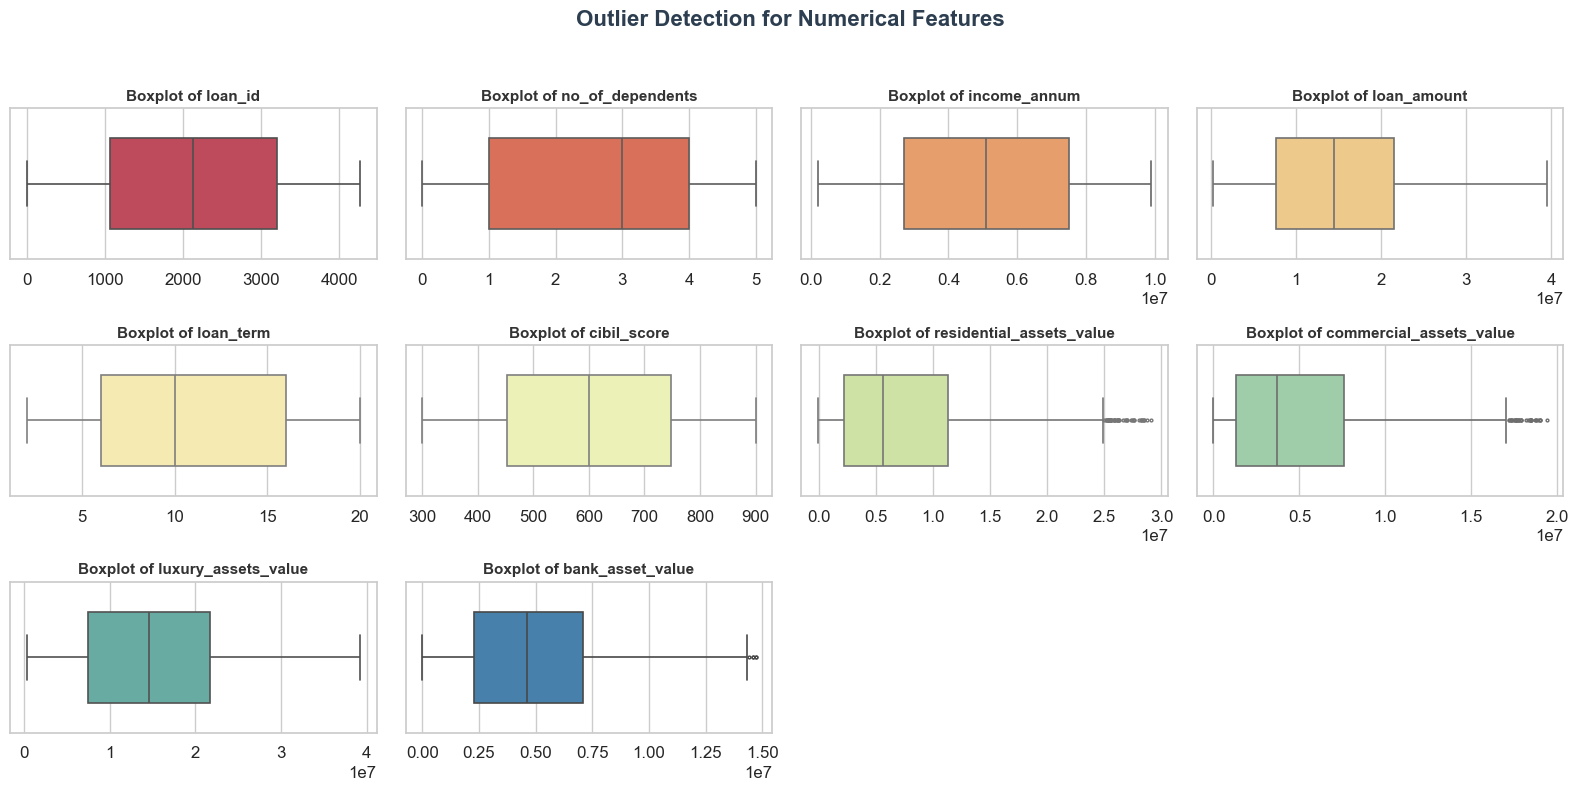

In [14]:
# Select numerical columns
numerical = Df.select_dtypes(include=['int64', 'float64']).columns
print(numerical)
# Set seaborn theme
sns.set(style="whitegrid", palette="Spectral", font_scale=1.1)

# Define color palette (vivid & unique)
palette = sns.color_palette("Spectral", len(numerical))

# Plot
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(
        x=Df[col],
        color=palette[i-1],
        width=0.6,
        fliersize=2,  
        linewidth=1.2
    )
    plt.title(f"Boxplot of {col}", fontsize=11, fontweight="bold", color="#333333")
    plt.xlabel("")  
plt.suptitle("Outlier Detection for Numerical Features", fontsize=16, fontweight="bold", color="#2c3e50")
plt.tight_layout(rect=[0, 0, 1, 0.96])  # space for suptitle
plt.show()

INFORMATION : 
- The asset-related features (residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value) show strong right-skewness with many high-value outliers, indicating that most applicants have low to moderate assets while a small group holds extremely large asset values.

- These outliers can affect model performance, especially in asset-related columns. Transformations such as log scaling or winsorization/capping are recommended before modeling.

<h4>5. EDA Exploratory Data analysis</h4>

I have included this section in the Data understanding for better visualize the distrbution of data also to get overview about the corelation between variables and better understand the data

Also in this section we wil response the question : what is the most variables that Affect our target ?.

In [15]:
#Before starting we set loan_id  column as the index of our dataset : 
Df.set_index("loan_id",inplace=True)
Df.head()


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


<h5> 5.1 The Proportion Of Loan_Approval Values </h5>

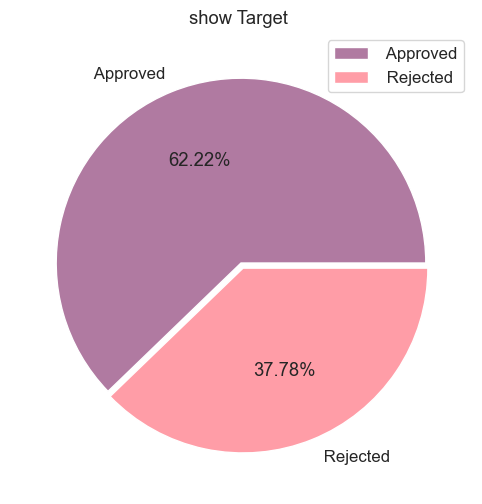

In [16]:
#show Target columns Analysis 
consistent_colors = [  '#B07AA1', '#FF9DA7']
plt.figure(figsize=(10,6))
explode = (0,0.03)
plt.pie(Df['loan_status'].value_counts().values,
        labels=Df['loan_status'].value_counts().index,
        colors=consistent_colors[:len(Df['loan_status'].value_counts())],
        explode=explode,
        autopct="%1.2f%%",
        )
plt.title('show Target ')
plt.legend()
plt.show()

We constate that we have a dominated class (approved classe) with 2600 rows 62.22% 

<h5> 5.2 Show The Distrbution of Numerical Data </h5>

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'],
      dtype='object')


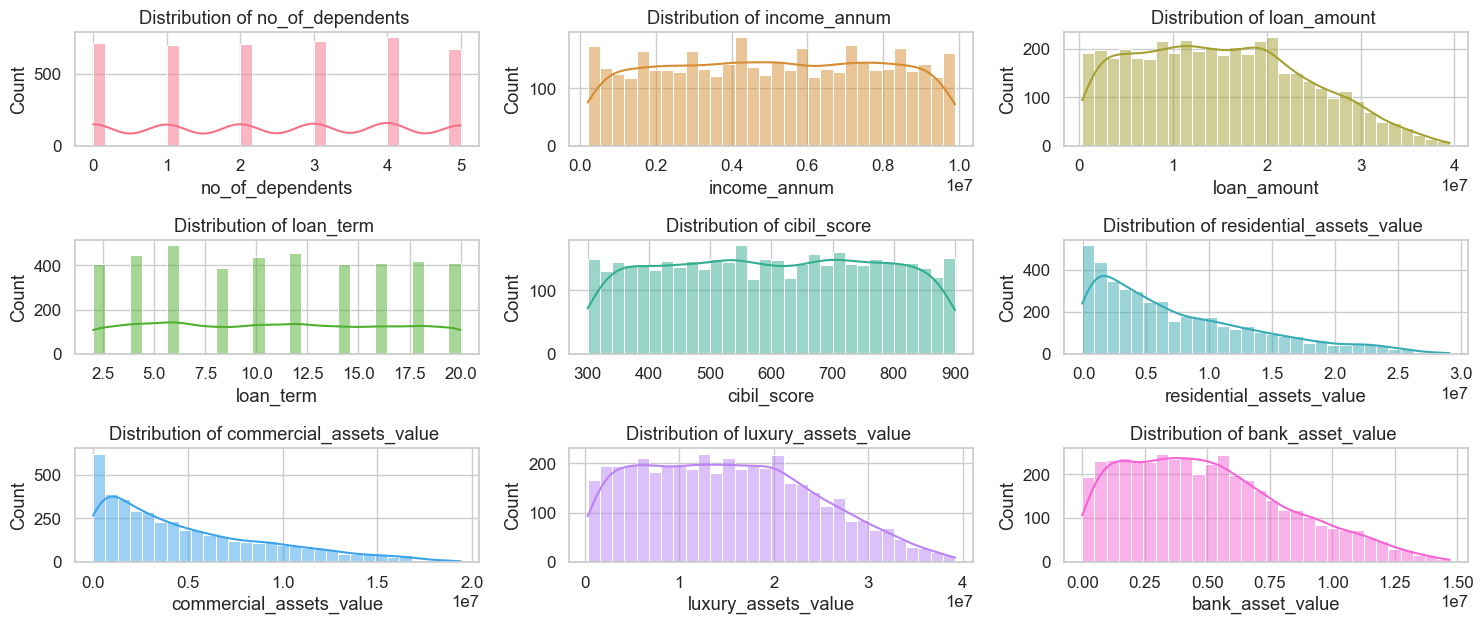

In [17]:
# Select numerical columns
numerical = Df.select_dtypes(include=['int64', 'float64']).columns
print(numerical)
#show Distribution for all numerical columns 
palette =sns.color_palette("husl",len(numerical))

plt.figure(figsize=(15,8))

#for loop 
for i,col in enumerate(numerical,1):
    plt.subplot(4,3,i)
    sns.histplot(Df[col],kde=True ,color=palette[i-1], bins=30)
    plt.title(f'Distribution of {col} ')

plt.tight_layout()
plt.show()



Observations and Insights from Distribution Plots : 

- Many financial features—including residential, commercial, luxury, and bank asset values, as well as loan_amount—show strong  right-skewness, with most values clustered low and a long tail of very large values.

- The cibil_score is left-skewed, while income_annum and loan_id display near-uniform distributions. Discrete variables such as no_of_dependents and loan_term show expected bar-shaped patterns.

- The distinction between continuous vs. discrete variables is clear in the histograms; KDE curves can be misleading for discrete features.

- The strong skew in financial variables indicates a need for preprocessing steps such as log or square-root transformations to normalize distributions and improve model performance.

<h5> 5.3 Relation between Target column with Categorical columns  </h5>

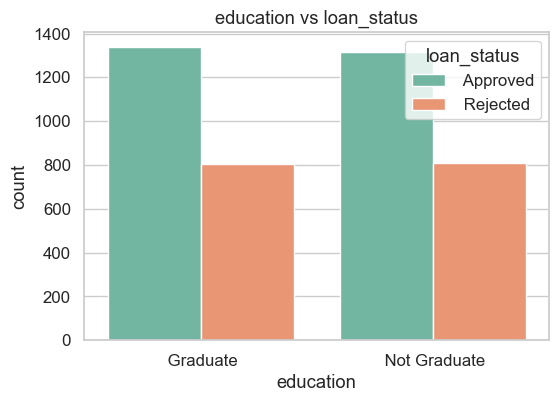

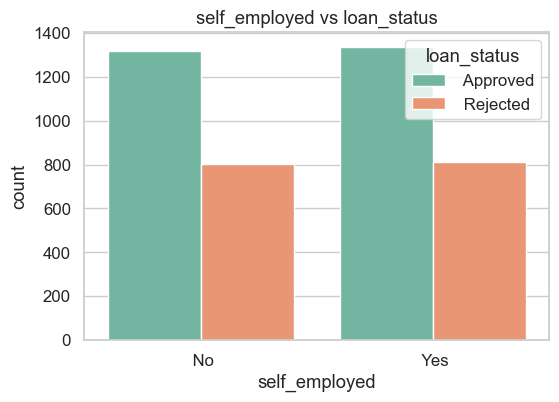

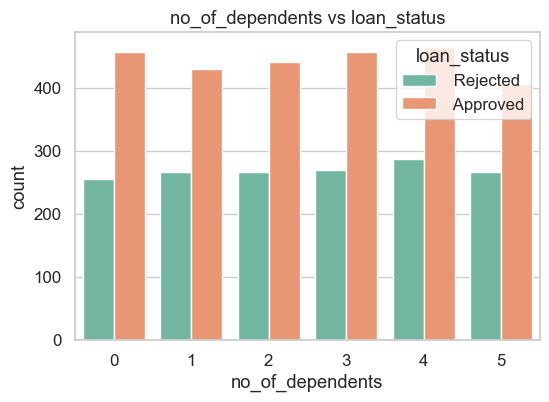

In [18]:
Df.columns = Df.columns.str.strip()

target = "loan_status"

# Categorical
categorical = ["education", "self_employed", "no_of_dependents"]
for col in categorical:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue=target, data=Df, palette="Set2")
    plt.title(f"{col} vs {target}")
    plt.show()



We remarque that the categorical havn't a highly impact about the Target Column 
and  their values change is not very impactfull . So the financial responsabilities can be the real reason to approve a loan. 

<h5> 5.4 Relation between Target column with Numerical columns  </h5>

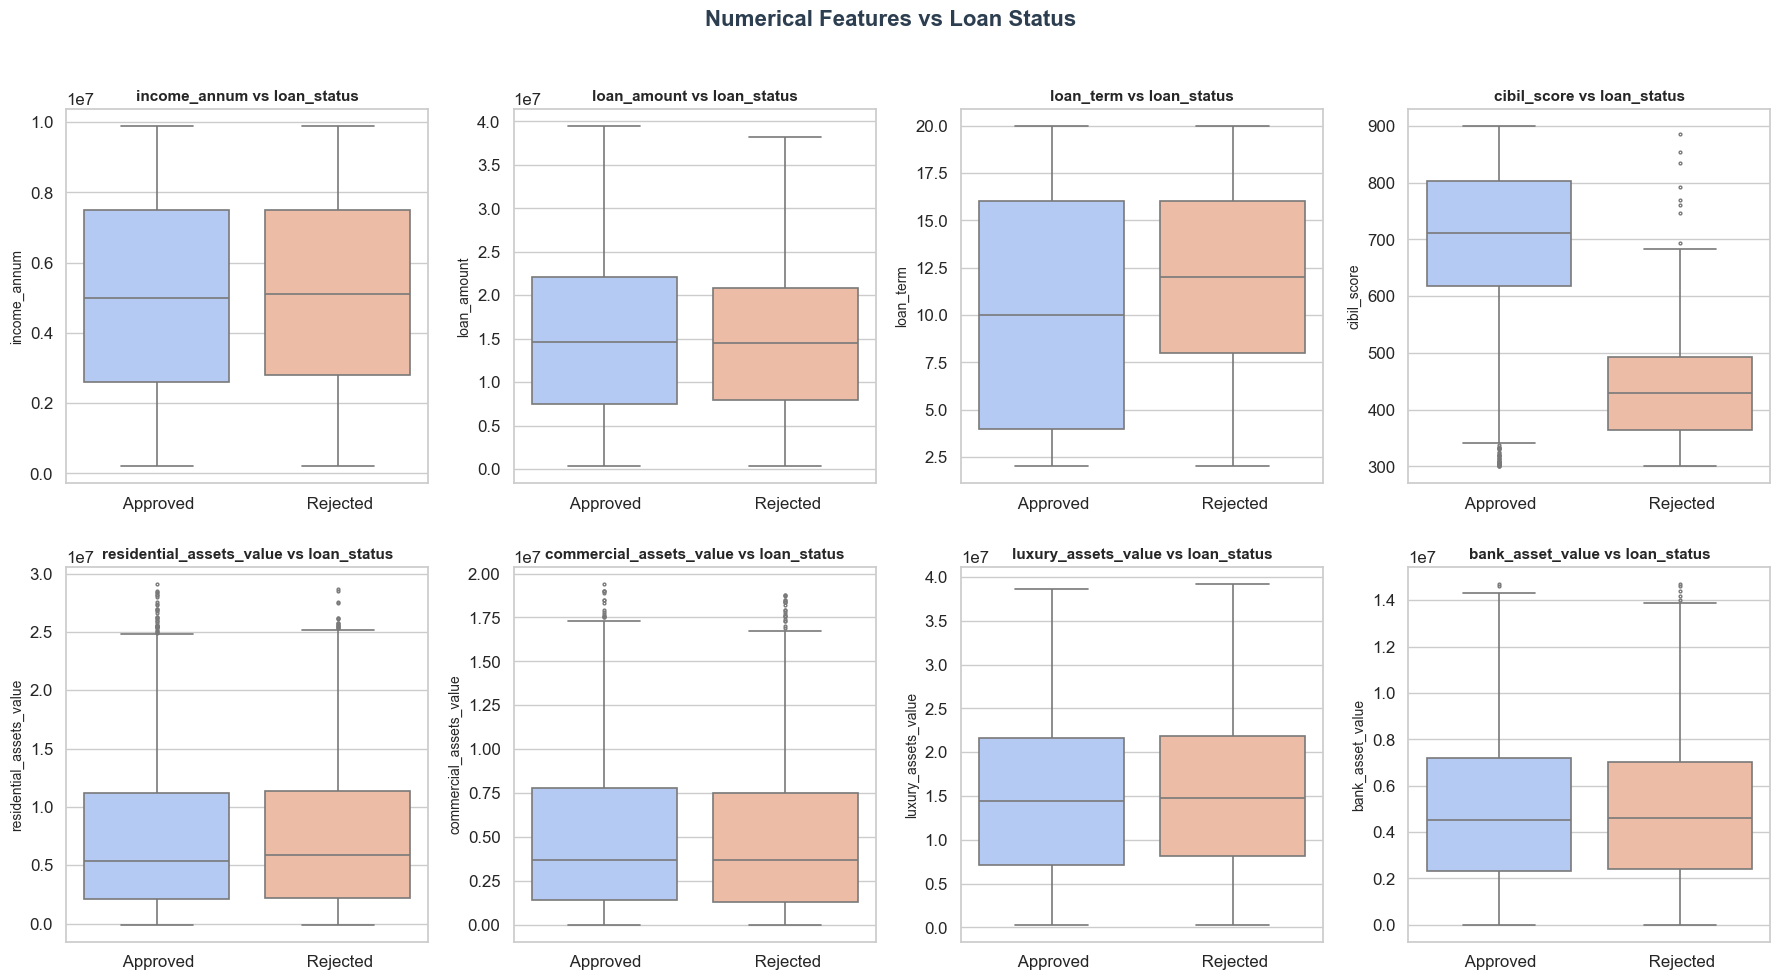

In [19]:
numerical = [
    "income_annum", "loan_amount", "loan_term", "cibil_score",
    "residential_assets_value", "commercial_assets_value",
    "luxury_assets_value", "bank_asset_value"
]


fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))
axes = axes.flatten()  

for i, col in enumerate(numerical):
    sns.boxplot(
        data=Df, 
        x=target, 
        y=col, 
        ax=axes[i], 
        palette="coolwarm",
        hue=target,
        legend=False,
        fliersize=2, 
        linewidth=1.2
    )
    axes[i].set_title(f"{col} vs {target}", fontsize=11, fontweight="bold")
    axes[i].set_xlabel("")  
    axes[i].set_ylabel(col, fontsize=10)

plt.suptitle("Numerical Features vs Loan Status", fontsize=16, fontweight="bold", color="#2c3e50")
plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

Information : CIBIL Score is the strongest predictor of loan status, with approved applicants having a significantly better score. While approved loans tend to be smaller in amount and shorter in term, high asset values surprisingly show a mild negative correlation with approval, possibly indicating rejection for complex or overly large loan applications from high-net-worth individuals.

- Finally we have the answer to our question the variable  highly impact the loan aproval is CRedit Score or (Cibil score) . also we can reduce the namber of parameters in our data by elimining the lowly impacted ones to reduce the complexity of modling .

<h3>III-DATA PREPROCESSING</h3>

##### After the verification of the quality of data lets imrove this quality and enforce the data to embrace the modling phase

<h4> 1. Columns rename : </h4> 

In [20]:
# renaming the index : 
Df.index.names = ['Loan_Id']

# renaming the columns  : 
headers = ["Dependants_namber","Education","Self_Employed","Annula_Income","Loan_Amount","Loan_Period_Months","Credit_Score","Residential_Assets","Commercial_Assets","Luxury_Assets","Bank_Assets","Loan_Approval_Status"]
Df.columns = headers

In [21]:
Df.head()

,Dependants_namber,Education,Self_Employed,Annula_Income,Loan_Amount,Loan_Period_Months,Credit_Score,Residential_Assets,Commercial_Assets,Luxury_Assets,Bank_Assets,Loan_Approval_Status
Loan_Id,,,,,,,,,,,,
1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


<h4> 2. Handling outliers : </h4> 

In [22]:
#remove outliers & Outliers processor before split data
def remove_outliers_iqr(Df, column):
    Q1 = Df[column].quantile(0.25)
    Q3 = Df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    print(f"range of normal data  min :{lower} max : {upper} --------> {column}")
    print(f"real data range min :{Df[column].min()} max : {Df[column].max()} ----------> {column} ")
    Df[column] = Df[column].clip(lower, upper)
    return Df


num_cols = ['Dependants_namber','Annula_Income','Loan_Amount','Loan_Period_Months',
            'Credit_Score','Residential_Assets',
            'Commercial_Assets','Luxury_Assets','Bank_Assets']

print(f"the data shape before removing outliers {Df.shape}")
for col in num_cols:
    df = remove_outliers_iqr(Df, col)

print(f"the data shape after  removing outliers {Df.shape} ")

the data shape before removing outliers (4269, 12)
range of normal data  min :-3.5 max : 8.5 --------> Dependants_namber
real data range min :0 max : 5 ----------> Dependants_namber 
range of normal data  min :-4500000.0 max : 14700000.0 --------> Annula_Income
real data range min :200000 max : 9900000 ----------> Annula_Income 
range of normal data  min :-13000000.0 max : 42200000.0 --------> Loan_Amount
real data range min :300000 max : 39500000 ----------> Loan_Amount 
range of normal data  min :-9.0 max : 31.0 --------> Loan_Period_Months
real data range min :2 max : 20 ----------> Loan_Period_Months 
range of normal data  min :10.5 max : 1190.5 --------> Credit_Score
real data range min :300 max : 900 ----------> Credit_Score 
range of normal data  min :-11450000.0 max : 24950000.0 --------> Residential_Assets
real data range min :-100000 max : 29100000 ----------> Residential_Assets 
range of normal data  min :-8150000.0 max : 17050000.0 --------> Commercial_Assets
real data rang

<h4> 3. Data Transformation : </h4> 

<h5> 2.1 Encoding Categorical Data : <h5>



- We used Label Encoding to convert categorical variables like education, self_employed, and loan_status into numerical form for model training.
    
- Machine learning algorithms cannot process text labels directly, so encoding ensures they can interpret categories as numeric values.

- We chose Label Encoding because these features have only two categories (binary) — making it a simple, efficient, and memory-friendly method compared to One-Hot Encoding.

- It helps keep the dataset compact and ready for ML models that expect numerical input.



In [23]:
# Encode to categorical
le = LabelEncoder()
Df['Education'] = le.fit_transform(Df['Education'])
Df['Self_Employed'] = le.fit_transform(Df['Self_Employed'])
Df['Loan_Approval_Status'] = le.fit_transform(Df['Loan_Approval_Status'])

Df.head()

,Dependants_namber,Education,Self_Employed,Annula_Income,Loan_Amount,Loan_Period_Months,Credit_Score,Residential_Assets,Commercial_Assets,Luxury_Assets,Bank_Assets,Loan_Approval_Status
Loan_Id,,,,,,,,,,,,
1,2,0,0,9600000,29900000,12,778,2400000,17050000,22700000,8000000,0
2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


NB : in the Loan_Approval_Status 

    Approved = 0
    Rejected = 1

<h3>III-Modeling : </h3>

Finally we arrived to Data Modeling part where we impliment a ML model to predicte the loan approval value " From scrath " in this section we have implimented 2 models from scratch KNN and Logistic Regression (simple and polynomiale)

In [24]:
Df.columns 

Index(['Dependants_namber', 'Education', 'Self_Employed', 'Annula_Income',
       'Loan_Amount', 'Loan_Period_Months', 'Credit_Score',
       'Residential_Assets', 'Commercial_Assets', 'Luxury_Assets',
       'Bank_Assets', 'Loan_Approval_Status'],
      dtype='object')

In [25]:
df.head()

,Dependants_namber,Education,Self_Employed,Annula_Income,Loan_Amount,Loan_Period_Months,Credit_Score,Residential_Assets,Commercial_Assets,Luxury_Assets,Bank_Assets,Loan_Approval_Status
Loan_Id,,,,,,,,,,,,
1,2,0,0,9600000,29900000,12,778,2400000,17050000,22700000,8000000,0
2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [26]:
# Specifying The Target and Independants Features : 
X = Df[['Dependants_namber','Education','Self_Employed','Annula_Income','Loan_Amount','Loan_Period_Months','Credit_Score','Residential_Assets','Commercial_Assets','Luxury_Assets','Bank_Assets']].values
y = Df[['Loan_Approval_Status']].values
print(X.shape)
print(y.shape)


(4269, 11)
(4269, 1)


<h4> 1. Data Split: </h4> 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
print(X_train)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

[[       5        1        0 ... 13900000 15900000  8700000]
 [       0        1        1 ... 10300000 38100000  7800000]
 [       1        0        0 ...  1100000  2900000   700000]
 ...
 [       4        1        1 ... 10600000 28700000  5400000]
 [       2        1        1 ...  1300000 19800000  9600000]
 [       4        0        0 ...  3700000 24700000  4600000]]
(3415, 11)
(854, 11)
(3415, 1)
(854, 1)


<h4> 2. Feature scaling (Z-score methode): </h4> 

In [29]:
zscore_scaler = StandardScaler()

# Standardisation Z-score

X_train_zscore = zscore_scaler.fit_transform(X_train)

X_test_zscore = zscore_scaler.transform(X_test)

In [30]:
# checking if the data is well scaled : 
print(X_train_zscore.mean())
print(X_train_zscore.std())

2.080652227701611e-17
0.9999999999999976

0.9999999999999976


<h4>2. Logistic Regression From Scratch (simple) </h4> 

<h5>2.1  Modele implimentation :  </h5> 

In [31]:
# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [32]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [33]:
# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

<h5>2.2  Cost function :  </h5> 

In [34]:
def log_loss(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

<h5>2.3   Optimisation - Gradient and  Descente de Gradient :  </h5> 

In [35]:
def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [36]:
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

<h5>2.4  Predection funtion :   </h5> 

In [37]:
def predict(X, W, b):
    A = modele(X, W, b)
    return A >= 0.5

<h5>2.5  Final Model    </h5> 

<h2>Before to run this cell reduce the namber of iterations it's will take time !!! </h2>

In [38]:
def regression_logistique(X, y, learning_rate=0.001, n_iter=1000000):
  # Initialisation
    W, b = initialisation(X)
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.001)

  # Prediction
    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    return W,b

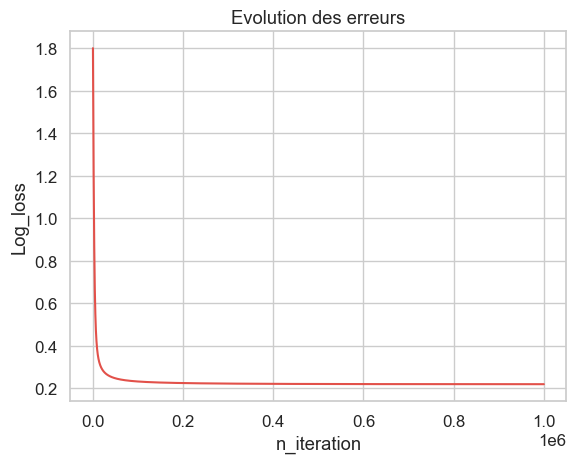

In [39]:
W,b=regression_logistique(X_train_zscore,y_train)

<h4> 3. KNN (K-Nearest Neighbors): </h4> 

In [40]:

class KNN:
    def __init__(self, k=3):
    
        self.k = k

    def fit(self, X, y):
        """
        Stores the training data.
        X: Training features (numpy array)
        y: Training labels (numpy array)
        """
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        """
        Predicts labels for the given input data X.
        """
        predicted_labels = [self._predict_single(x) for x in X]
        return np.array(predicted_labels)

    def _predict_single(self, x):
        """
        Helper method to predict the label for a single data point x.
        """
        # 1. Compute distances between x and all examples in the training set
        # Using Euclidean distance: sqrt(sum((x - x_train)^2))
        distances = [np.sqrt(np.sum((x_train - x)**2)) for x_train in self.X_train]
        
        # 2. Sort the distances and get the indices of the first k neighbors
        # np.argsort returns the indices that would sort the array
        k_indices = np.argsort(distances)[:self.k]
        
        # 3. Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # 4. Return the most common class label (Majority Vote)
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [46]:
clf_KNN = KNN(k=5)
clf_KNN.fit(X_train_zscore, y_train.ravel())

<h4> 4. SVM (Support Vector machine) </h4> 

In [42]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        """
        learning_rate: How big the steps are during gradient descent.
        lambda_param: Regularization parameter (controls margin hardness).
        n_iters: How many times to loop over the data.
        """
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # 1. Initialize weights and bias to zero
        self.w = np.zeros(n_features)
        self.b = 0
        
        # --- FIX 1: Ensure y is a 1D array ---
        # This prevents the "shapes (11,) and (1,) not aligned" error
        # by converting [[1], [0]] (2D) into [1, 0] (1D).
        y = np.array(y).flatten()
        
        # 2. Convert labels: if 0 (or negative), make it -1; otherwise 1
        y_ = np.where(y <= 0, -1, 1)
        
        # 3. Gradient Descent
        for _ in range(self.n_iters):
            for i, x_i in enumerate(X):
                # The condition: is the point correctly classified AND outside the margin?
                # y_i * (w.x + b) >= 1
                condition = y_[i] * (np.dot(x_i, self.w) + self.b) >= 1
                
                if condition:
                    # Case 1: Correct & Safe. 
                    # Only apply regularization gradient to keep weights small.
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    # Case 2: Wrong or Unsafe (inside margin).
                    # Gradient = 2 * lambda * w - (y_i * x_i)
                    
                    # --- FIX 2: Use simple multiplication (*) instead of np.dot ---
                    # Because y_[i] is a scalar (single number), we just want to scale
                    # the vector x_i. np.dot caused the shape mismatch error.
                    self.w -= self.lr * (2 * self.lambda_param * self.w - (x_i * y_[i]))
                    self.b -= self.lr * (-y_[i])

    def predict(self, X):
        # Calculate linear output: w.x + b
        approx = np.dot(X, self.w) + self.b
        # Return sign: -1 or 1
        return np.sign(approx)

In [47]:
clf_SVM = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)

print("Training model...")
clf_SVM.fit(X_train_zscore,y_train)
print("Training complete.")

# 4. Make predictions
predictions = clf_SVM.predict(X_test_zscore)

Training model...
Training complete.
Training complete.


<h3>V - Evaluation: </h3>

Here we will evaluate the performance of the three models we trained on the test set. We will use metrics like Accuracy, Precision, Recall, F1-Score, and the Confusion Matrix.

<h4>V.1 Logistic Regression Evaluation</h4>

--- Logistic Regression Performance ---
Accuracy: 0.9040
Precision: 0.8782
Recall: 0.8616
F1-Score: 0.8698



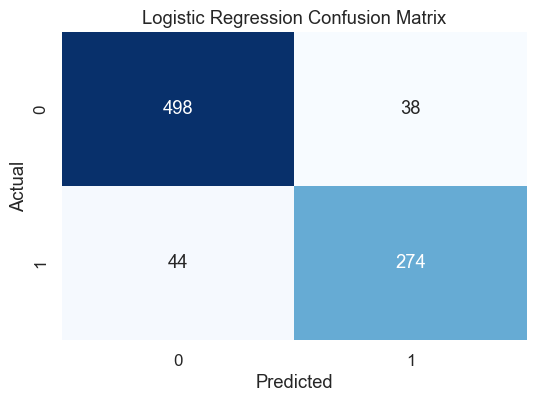

In [44]:
# Get predictions from the logistic regression model
y_pred_lr = predict(X_test_zscore, W, b)

# Calculate metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)

print("--- Logistic Regression Performance ---")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-Score: {f1_lr:.4f}\n")

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<h4>V.2 K-Nearest Neighbors (KNN) Evaluation</h4>

--- K-Nearest Neighbors (KNN) Performance ---
Accuracy: 0.8899
Precision: 0.8394
Recall: 0.8711
F1-Score: 0.8549



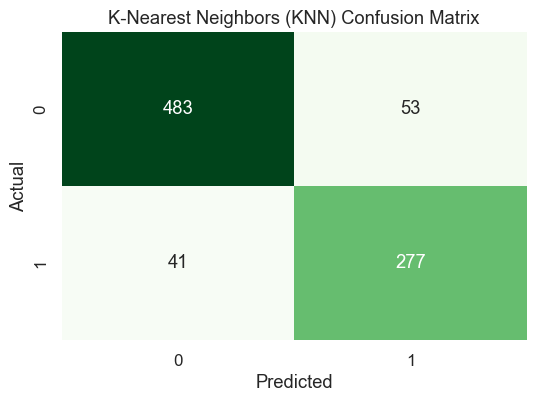

In [48]:
# Get predictions from the KNN model
y_pred_knn = clf_KNN.predict(X_test_zscore)

# Calculate metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

print("--- K-Nearest Neighbors (KNN) Performance ---")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1-Score: {f1_knn:.4f}\n")

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('K-Nearest Neighbors (KNN) Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<h4>V.3 Support Vector Machine (SVM) Evaluation</h4>

--- Support Vector Machine (SVM) Performance ---
Accuracy: 0.9262
Precision: 0.8923
Recall: 0.9119
F1-Score: 0.9020



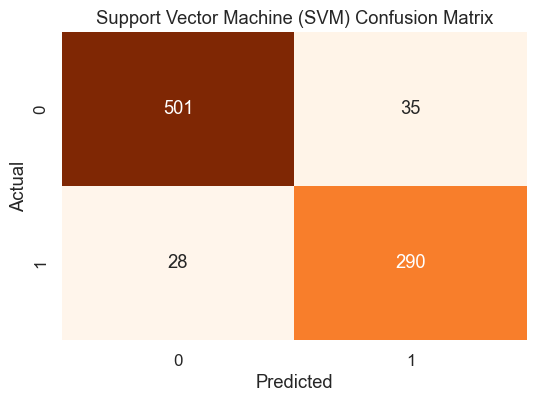

In [50]:
# Get predictions from the SVM model
y_pred_svm_raw = clf_SVM.predict(X_test_zscore)

# Convert SVM predictions from [-1, 1] to [0, 1] to match y_test
# -1 (Approved) becomes 0
#  1 (Rejected) becomes 1
y_pred_svm = np.where(y_pred_svm_raw <= 0, 0, 1)

# Calculate metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

print("--- Support Vector Machine (SVM) Performance ---")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-Score: {f1_svm:.4f}\n")

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Support Vector Machine (SVM) Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<h4>V.4 Models Comparison</h4>

<p>Finally, let's create a summary table and a bar plot to visually compare the performance metrics (Accuracy, Precision, Recall, and F1-Score) of our three models. This will help us to quickly identify which model performed best on the test set according to each metric.</p>

--- Model Performance Comparison ---
                     Accuracy  Precision    Recall  F1-Score
Model                                                       
Logistic Regression  0.903981   0.878205  0.861635  0.869841
KNN                  0.889930   0.839394  0.871069  0.854938
SVM                  0.926230   0.892308  0.911950  0.902022


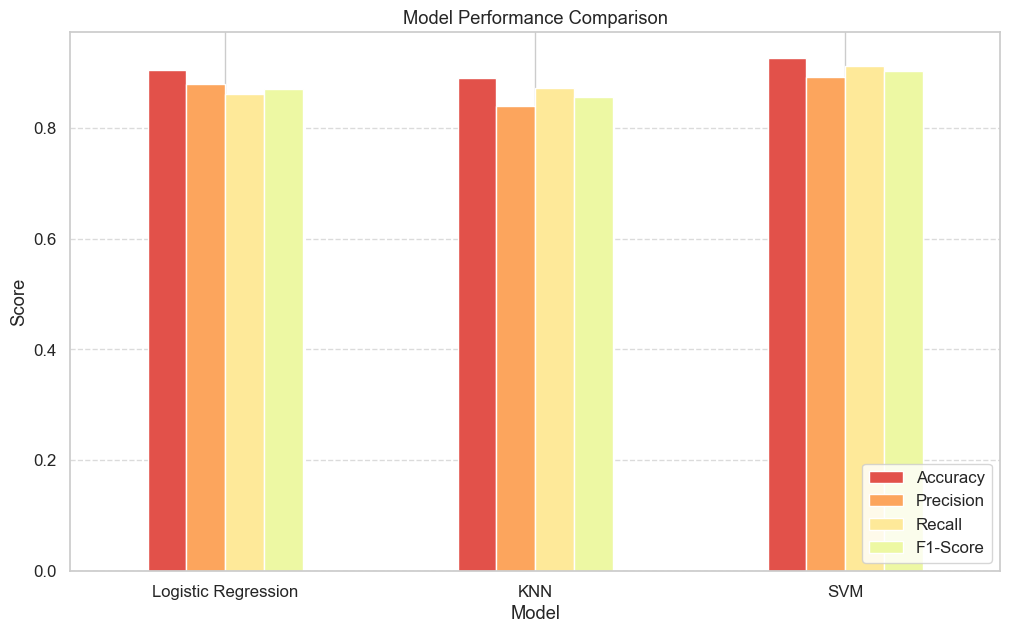

In [51]:
# Create a dictionary with the performance metrics
performance_data = {
    'Model': ['Logistic Regression', 'KNN', 'SVM'],
    'Accuracy': [accuracy_lr, accuracy_knn, accuracy_svm],
    'Precision': [precision_lr, precision_knn, precision_svm],
    'Recall': [recall_lr, recall_knn, recall_svm],
    'F1-Score': [f1_lr, f1_knn, f1_svm]
}

# Create a DataFrame from the dictionary
performance_df = pd.DataFrame(performance_data)

# Set 'Model' as the index
performance_df.set_index('Model', inplace=True)

# Display the performance table
print("--- Model Performance Comparison ---")
print(performance_df)

# Plotting the performance metrics for comparison
performance_df.plot(kind='bar', figsize=(12, 7))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h3> VI - DEPLOYEMENT <h3>

<h4> V.1 Serialize (Save) the Model and Scaler : We must save the mathematical "state" of Our trained model  </h4> 

In [ ]:
# 1. Define the dictionary
artifacts = {
    "W": W,              # Your trained weights
    "b": b,              # Your trained bias
    "scaler": zscore_scaler  # Your fitted scaler
}

# 2. Save to file
with open('../models/model.pkl', 'wb') as file:
    pickle.dump(artifacts, file)

Saved SVM deployment bundle to: ..\models\svm_model.pkl


  <p style="color: #34495e; font-family: 'Helvetica Neue', sans-serif; font-size: 1.2em; margin-top: -10px;">
        <strong>Réalisé par :</strong> KHOUMRI Tarik CCN , ZOUHARI Dyae Errahmane GLSID, MONTAKI Souhaib GLSID & SAMY AYOUB BDCC
    </p>